Start by loading the PETLION package

In [3]:
using PETLION, Plots

Loading the parameters for an LCO cell

In [4]:
@time p = Params(LCO;
    N_p = 10, # discretizations in the cathode
    N_s = 10, # discretizations in the separator
    N_n = 10, # discretizations in the anode
    N_r_p = 10, # discretizations in the solid cathode particles
    N_r_n = 10, # discretizations in the solid anode particles
    temperature = false, # temperature enabled or disabled
    jacobian    = :symbolic # :symbolic or :AD
    );

 35.158811 seconds (2.77 M allocations: 169.953 MiB, 0.18% gc time, 1.14% compilation time)


In [16]:
# Load the model and parameters with an initial SOC of 0
model = model_output()
p.opts.outputs = (:t, :V, :I)
p.opts.SOC = 0
# GITT: 20 1C pulses followed by 2 hour rests
@time for i in 1:20
    run_model!(model, p, 3600/20, I=1)
    run_model!(model, p, 2*3600,  I=:rest)
end

  0.102316 seconds (32.66 k allocations: 42.132 MiB, 7.98% gc time)


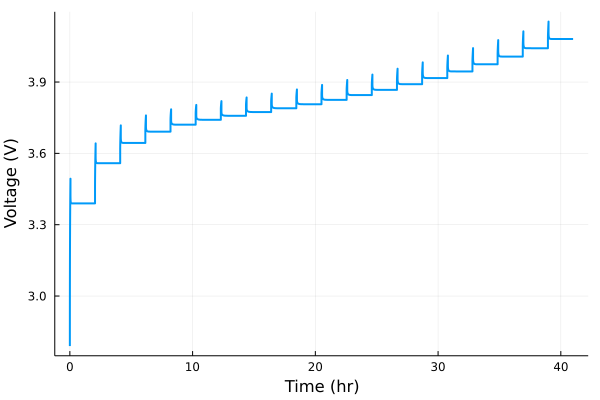

In [17]:
plot(model, :V)

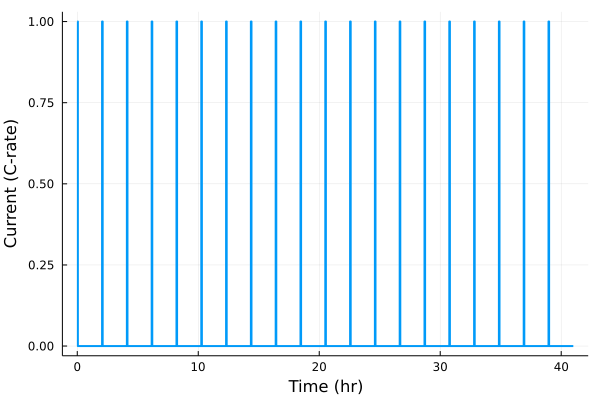

In [18]:
plot(model, :I)